In [89]:
import numpy as np

In [90]:
def take_input(n):
    print(f"Enter {n} values of x")
    X = list(map(int , input().split()))
    print(f"Enter {n} values of y")
    Y = list(map(int , input().split()))
    X = np.array(X)
    Y = np.array(Y)
    sorted_indices = np.argsort(X)
    X = X[sorted_indices]
    Y = Y[sorted_indices]

    print("After sorting : ")
    print("X :", X)
    print("Y :", Y)

In [91]:
def decomposition(matrix, n):
    for i in range(1,n):
        e_k = matrix[i][i-1]
        f_k_minus_1 = matrix[i-1][i-1]

        matrix[i][i-1] = e_k/f_k_minus_1

        e_k = matrix[i][i-1]
        g_k_minus_1 = matrix[i-1][i]
        matrix[i][i] = matrix[i][i] - e_k*g_k_minus_1
    return matrix

def forward_substitution(matrix, n, r):
    for i in range(1,n):
        e_k = matrix[i][i-1]
        r_k_minus_1 = r[i-1]

        r[i] = r[i] - e_k*r_k_minus_1
    return r

def back_substitution(matrix, n, r):
    x = np.zeros((n,1))
    for i in range(n):
        x[i][0] = r[i]/matrix[i][i]
    for k in range(n-2, -1, -1):
        r_k = r[k]
        g_k = matrix[k][k+1]
        f_k = matrix[k][k]
        x[k][0] = (r_k - g_k*x[k-1][0])/f_k
    
    return x


def steps(matrix, r):
    n = matrix.shape[0]
    matrix = decomposition(matrix, n) # this will perform the decomposition step and return updated matrix
    r = forward_substitution(matrix, n, r) # this will perform the forward_substitution step and return updated r
    x = back_substitution(matrix, n, r) # this will perform the back_substitution step and find x

    # print(x)
    return x

def tridiagonal_solve(e, f, g, r):
    """
    Solve tridiagonal system using Thomas algorithm.
    e = sub-diagonal (len n-1)
    f = main diagonal (len n)
    g = super-diagonal (len n-1)
    r = RHS (len n)
    """
    n = len(f)

    # decomposition and forward elimination 
    for k in range(1, n):
        factor = e[k-1] / f[k-1] 
        f[k] = f[k] - factor * g[k-1]
        r[k] = r[k] - factor * r[k-1]

    # Back substitution
    x = np.zeros(n)
    x[-1] = r[-1] / f[-1]
    for k in range(n-2, -1, -1):
        x[k] = (r[k] - g[k] * x[k+1]) / f[k]

    return x

In [ ]:
def natural_cubic_spline(x, y):
    n = len(x)-1
    h = np.diff(x)
    b = np.diff(y)/h
    A = np.zeros((n+1, n+1))
    rhs = np.zeros(n+1)

    A[0, 0] = 4
    

    A[n, n] = 4
    

    

    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i] = 2*(h[i-1]+h[i])
        A[i][i+1] = h[i]
        rhs[i] = 6*(b[i]-b[i-1])
        print(rhs[i])

    A[0, 1] = 1
    A[n, n-1] = 1
    
    print(A)
    print(rhs)
    # m = steps(A, rhs)
    n = len(rhs)
    e = np.array([A[i, i-1] for i in range(1, n)], dtype=float)  # sub-diagonal
    f = np.array([A[i, i] for i in range(n)], dtype=float)       # main diagonal
    g = np.array([A[i, i+1] for i in range(n-1)], dtype=float)   # super-diagonal
    m = tridiagonal_solve(e, f, g, rhs)

    print(m)
    # print(np.linalg.solve(A, rhs))


In [96]:
X = np.array([0,1,2,3,4])
Y = np.array([1,2.7183,7.3891,20.0855,54.5981])
natural_cubic_spline(X, Y)



17.714999999999996
48.153600000000004
130.89720000000003
[[4. 1. 0. 0. 0.]
 [1. 4. 1. 0. 0.]
 [0. 1. 4. 1. 0.]
 [0. 0. 1. 4. 1.]
 [0. 0. 0. 1. 4.]]
[  0.      17.715   48.1536 130.8972   0.    ]
[-1.01708308  4.06833231  2.45875385 34.25025231 -8.56256308]
[ -1.08924239   4.35696955   1.37636418  33.56717374 -16.38078769]


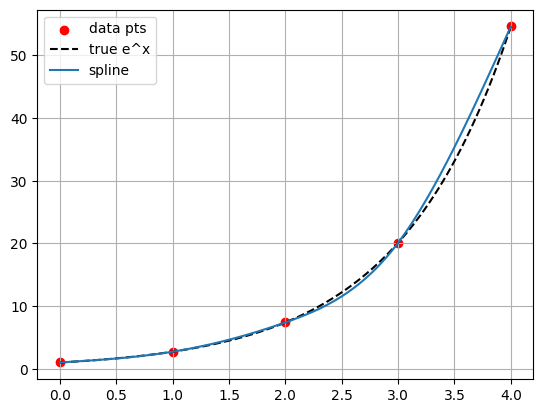

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def nat_cubic_spline(x, y):
    n = len(x) - 1
    h = np.diff(x)

    # system for 2nd derivatives
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)

    # boundary cond
    A[0,0] = 1
    A[n,n] = 1

    # fill matrix inside
    for i in range(1, n):
        A[i,i-1] = h[i-1]
        A[i,i]   = 2*(h[i-1] + h[i])
        A[i,i+1] = h[i]
        b[i] = 6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])

    # Thomas algo (not using np.linalg.solve)
    def thomas(a, d, c, rhs):
        N = len(d)
        for i in range(1, N):
            w = a[i-1]/d[i-1]
            d[i] = d[i] - w*c[i-1]
            rhs[i] = rhs[i] - w*rhs[i-1]
        sol = np.zeros(N)
        sol[-1] = rhs[-1]/d[-1]
        for i in range(N-2,-1,-1):
            sol[i] = (rhs[i]-c[i]*sol[i+1])/d[i]
        return sol

    # diagonals
    low = np.zeros(n)
    diag = np.zeros(n+1)
    up = np.zeros(n)
    for i in range(n+1):
        diag[i] = A[i,i]
        if i>0: low[i-1] = A[i,i-1]
        if i<n: up[i] = A[i,i+1]

    m = thomas(low, diag, up, b)

    # spline eval
    def S(xq):
        xq = np.atleast_1d(xq)
        ans = np.zeros_like(xq, dtype=float)
        for k,val in enumerate(xq):
            i = np.searchsorted(x, val) - 1
            if i<0: i=0
            if i>n-1: i=n-1
            hi = h[i]
            A_ = (x[i+1]-val)/hi
            B_ = (val-x[i])/hi
            ans[k] = A_*y[i] + B_*y[i+1] + ((A_**3 - A_)*m[i]*hi**2)/6 + ((B_**3 - B_)*m[i+1]*hi**2)/6
        return ans if len(ans)>1 else ans[0]

    return S

# test data
x = np.array([0,1,2,3,4])
y = np.array([1,2.7183,7.3891,20.0855,54.5981])

S = nat_cubic_spline(x,y)
x_dense = np.linspace(min(x), max(x), 200)

plt.scatter(x, y, color='r', label='data pts')
plt.plot(x_dense, np.exp(x_dense), 'k--', label='true e^x')
plt.plot(x_dense, S(x_dense), label='spline')
plt.legend()
plt.grid(True)
plt.tight_layout
plt.show()